In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import fetch_20newsgroups
np.random.seed(0)
random.seed(0)

In [2]:
classes = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
           'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

In [3]:
df = fetch_20newsgroups(subset = 'all', categories = classes, shuffle = True, random_state = 0, remove = ('headers','footers'))

In [4]:
true_labels = df.target // 4

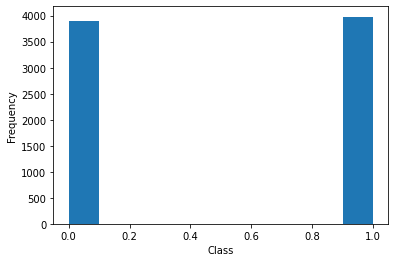

In [5]:
plt.hist(true_labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [6]:
#QUESTION 1
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer


def custom_analyzer(text_data):
    tokenizer = CountVectorizer().build_analyzer()
    word_list = []
    stopwords = text.ENGLISH_STOP_WORDS
    for word in tokenizer(text_data):
        if (word not in stopwords) and not(any(ch.isdigit() for ch in word)):
            word_list.append(word)
    return word_list
                                          

In [7]:
vectorizer = CountVectorizer(min_df = 3,
                             analyzer = custom_analyzer,
                            stop_words = 'english')
data_matrix = vectorizer.fit_transform(df["data"])

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf_data = tfidf.fit_transform(data_matrix)

In [9]:
print("Dimensions of the TF-IDF matrix: ", tfidf_data.shape)

Dimensions of the TF-IDF matrix:  (7882, 19198)


In [10]:
#QUESTION 2 and 3
from sklearn.cluster import KMeans
k_means_2 = KMeans(n_clusters = 2, random_state = 0, max_iter = 2000, n_init = 40)
k_means_2.fit(tfidf_data)

KMeans(max_iter=2000, n_clusters=2, n_init=40, random_state=0)

In [11]:
prediction_k_means_2 = k_means_2.predict(tfidf_data)

In [12]:
from sklearn.metrics.cluster import homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, contingency_matrix
from plotmat import plot_mat
from scipy.optimize import linear_sum_assignment

Homogeneity score for K-Means(2 Clusters):  0.548248109955938
V-measure score for K-Means(2 Clusters):  0.5569910479465977
Completeness score for K-Means(2 Clusters):  0.566017352876744
Adjusted rand score for K-Means(2 Clusters):  0.6016472672746861
Adjusted mutual information score for K-Means(2 Clusters):  0.5569498430462471


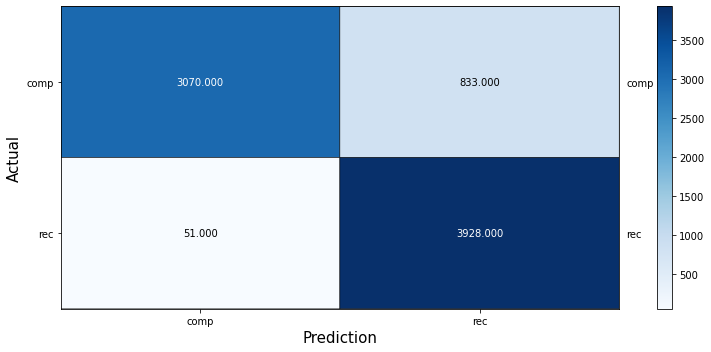

In [13]:
h_s_km_2 = homogeneity_score(true_labels,prediction_k_means_2)
v_s_km_2 = v_measure_score(true_labels,prediction_k_means_2)
c_s_km_2 = completeness_score(true_labels,prediction_k_means_2)
a_r_s_km_2 = adjusted_rand_score(true_labels,prediction_k_means_2)
a_m_i_s_km_2 = adjusted_mutual_info_score(true_labels,prediction_k_means_2)

print("Homogeneity score for K-Means(2 Clusters): ",h_s_km_2)
print("V-measure score for K-Means(2 Clusters): ",v_s_km_2)
print("Completeness score for K-Means(2 Clusters): ",c_s_km_2)
print("Adjusted rand score for K-Means(2 Clusters): ",a_r_s_km_2)
print("Adjusted mutual information score for K-Means(2 Clusters): ",a_m_i_s_km_2)



contingency_mat = contingency_matrix(true_labels,prediction_k_means_2)

rows, cols = linear_sum_assignment(contingency_mat, maximize=True)
contingency_mat = contingency_mat[rows[:, np.newaxis], cols]

class_labels = ["comp","rec"]
plot_mat(contingency_mat,xticklabels = class_labels, yticklabels = class_labels, size = (10,5), if_show_values = True, xlabel = 'Prediction', ylabel = 'Actual')
plt.show()

In [14]:
#Question 4
from sklearn.decomposition import TruncatedSVD
dim_red_svd = TruncatedSVD(n_components = 1000, random_state = 0)
svd_data = dim_red_svd.fit_transform(tfidf_data)

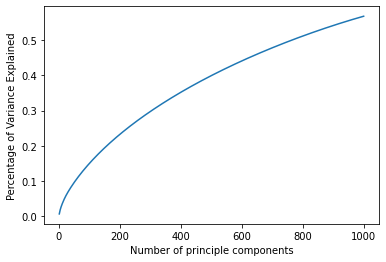

In [15]:
percentage_of_variance = np.cumsum(np.sort(dim_red_svd.explained_variance_ratio_)[::-1])
plt.plot(np.arange(1,1001),percentage_of_variance)
plt.ylabel("Percentage of Variance Explained")
plt.xlabel("Number of principle components")
plt.show()

In [16]:
#Question 5,6,7
r_list = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]

svd_h_s_km_2 = []
svd_v_s_km_2 = []
svd_c_s_km_2 = []
svd_a_r_s_km_2 = []
svd_a_m_i_s_km_2 = []

for r in r_list:
    dim_red_data = svd_data[:,0:r]
    k_means_2.fit(dim_red_data)
    prediction = k_means_2.predict(dim_red_data)
    svd_h_s_km_2.append(homogeneity_score(true_labels,prediction))
    svd_v_s_km_2.append(v_measure_score(true_labels,prediction))
    svd_c_s_km_2.append(completeness_score(true_labels,prediction))
    svd_a_r_s_km_2.append(adjusted_rand_score(true_labels,prediction))
    svd_a_m_i_s_km_2.append(adjusted_mutual_info_score(true_labels,prediction))

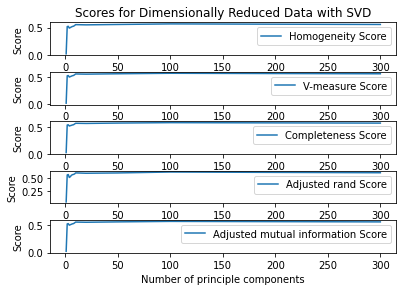

In [17]:
ax1 = plt.subplot(511)
plt.plot(r_list,svd_h_s_km_2, label = "Homogeneity Score")
plt.ylabel("Score")
plt.title("Scores for Dimensionally Reduced Data with SVD")
plt.legend()
ax2 = plt.subplot(512)
plt.plot(r_list,svd_v_s_km_2, label = "V-measure Score")
plt.ylabel("Score")
plt.legend()
ax3 = plt.subplot(513)
plt.plot(r_list,svd_c_s_km_2,label = "Completeness Score")
plt.ylabel("Score")
plt.legend()
ax4 = plt.subplot(514)
plt.plot(r_list,svd_a_r_s_km_2,label = "Adjusted rand Score")
plt.ylabel("Score")
plt.legend()
ax5 = plt.subplot(515)
plt.plot(r_list,svd_a_m_i_s_km_2,label = "Adjusted mutual information Score")
plt.ylabel("Score")
plt.xlabel("Number of principle components")
plt.legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)
plt.show()

In [18]:
bestidx_svd = 12 # 100

In [19]:
print("R value with best Homogeneity Score: ", r_list[np.argmax(svd_h_s_km_2)], " with score: ", svd_h_s_km_2[np.argmax(svd_h_s_km_2)])
print("R value with best V-measure Score: ",r_list[np.argmax(svd_v_s_km_2)]," with score: ", svd_v_s_km_2[np.argmax(svd_v_s_km_2)])
print("R value with best Completeness Score: ",r_list[np.argmax(svd_c_s_km_2)]," with score: ", svd_c_s_km_2[np.argmax(svd_c_s_km_2)])
print("R value with best Adjusted Rand Score: ",r_list[np.argmax(svd_a_r_s_km_2)]," with score: ", svd_a_r_s_km_2[np.argmax(svd_a_r_s_km_2)])
print("R value with best Adjusted Mutual Information Score: ",r_list[np.argmax(svd_a_m_i_s_km_2)], " with score: ", svd_a_m_i_s_km_2[np.argmax(svd_a_m_i_s_km_2)])
#Since all scores are maximized when r = 100, best choice of r for SVD is 100.

R value with best Homogeneity Score:  100  with score:  0.565337495177786
R value with best V-measure Score:  100  with score:  0.572929522695855
R value with best Completeness Score:  100  with score:  0.5807282354679592
R value with best Adjusted Rand Score:  100  with score:  0.6246984867088713
R value with best Adjusted Mutual Information Score:  100  with score:  0.5728898987834302


In [20]:
print("Average(SVD) Homogeneity score for K-Means(2 Clusters): ",np.mean(svd_h_s_km_2))
print("Average(SVD) V-measure score for K-Means(2 Clusters): ",np.mean(svd_v_s_km_2))
print("Average(SVD) Completeness score for K-Means(2 Clusters): ",np.mean(svd_c_s_km_2))
print("Average(SVD) Adjusted rand score for K-Means(2 Clusters): ",np.mean(svd_a_r_s_km_2))
print("Average(SVD) Adjusted mutual information score for K-Means(2 Clusters): ",np.mean(svd_a_m_i_s_km_2))

Average(SVD) Homogeneity score for K-Means(2 Clusters):  0.49383467908513723
Average(SVD) V-measure score for K-Means(2 Clusters):  0.5027877042548988
Average(SVD) Completeness score for K-Means(2 Clusters):  0.5120873377170859
Average(SVD) Adjusted rand score for K-Means(2 Clusters):  0.5404806977431316
Average(SVD) Adjusted mutual information score for K-Means(2 Clusters):  0.5027414133905107


In [21]:
from sklearn.decomposition import NMF

nmf_h_s_km_2 = []
nmf_v_s_km_2 = []
nmf_c_s_km_2 = []
nmf_a_r_s_km_2 = []
nmf_a_m_i_s_km_2 = []

for r in r_list:
    nmf = NMF(n_components = r, init = 'random', random_state = 0,max_iter = 1000)
    dim_red_data = nmf.fit_transform(tfidf_data)
    k_means_2.fit(dim_red_data)
    prediction = k_means_2.predict(dim_red_data)
    nmf_h_s_km_2.append(homogeneity_score(true_labels,prediction))
    nmf_v_s_km_2.append(v_measure_score(true_labels,prediction))
    nmf_c_s_km_2.append(completeness_score(true_labels,prediction))
    nmf_a_r_s_km_2.append(adjusted_rand_score(true_labels,prediction))
    nmf_a_m_i_s_km_2.append(adjusted_mutual_info_score(true_labels,prediction))

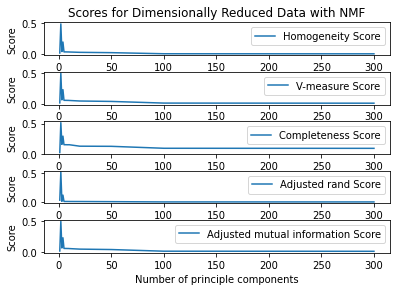

In [22]:
ax1 = plt.subplot(511)
plt.plot(r_list,nmf_h_s_km_2, label = "Homogeneity Score")
plt.ylabel("Score")
plt.title("Scores for Dimensionally Reduced Data with NMF")
plt.legend()
ax2 = plt.subplot(512)
plt.plot(r_list,nmf_v_s_km_2, label = "V-measure Score")
plt.ylabel("Score")
plt.legend()
ax3 = plt.subplot(513)
plt.plot(r_list,nmf_c_s_km_2,label = "Completeness Score")
plt.ylabel("Score")
plt.legend()
ax4 = plt.subplot(514)
plt.plot(r_list,nmf_a_r_s_km_2,label = "Adjusted rand Score")
plt.ylabel("Score")
plt.legend()
ax5 = plt.subplot(515)
plt.plot(r_list,nmf_a_m_i_s_km_2,label = "Adjusted mutual information Score")
plt.ylabel("Score")
plt.xlabel("Number of principle components")
plt.legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)
plt.show()

In [23]:
print("R value with best Homogeneity Score: ", r_list[np.argmax(nmf_h_s_km_2)], " with score: ", svd_h_s_km_2[np.argmax(nmf_h_s_km_2)])
print("R value with best V-measure Score: ",r_list[np.argmax(nmf_v_s_km_2)]," with score: ", svd_v_s_km_2[np.argmax(nmf_v_s_km_2)])
print("R value with best Completeness Score: ",r_list[np.argmax(nmf_c_s_km_2)]," with score: ", svd_c_s_km_2[np.argmax(nmf_c_s_km_2)])
print("R value with best Adjusted Rand Score: ",r_list[np.argmax(nmf_a_r_s_km_2)]," with score: ", svd_a_r_s_km_2[np.argmax(nmf_a_r_s_km_2)])
print("R value with best Adjusted Mutual Information Score: ",r_list[np.argmax(nmf_a_m_i_s_km_2)], " with score: ", svd_a_m_i_s_km_2[np.argmax(nmf_a_m_i_s_km_2)])
#Since all scores are maximized when r = 100, best choice of r for SVD is 100.

R value with best Homogeneity Score:  2  with score:  0.5162892365151917
R value with best V-measure Score:  2  with score:  0.5260547374542737
R value with best Completeness Score:  2  with score:  0.5361967854409794
R value with best Adjusted Rand Score:  2  with score:  0.5663537909106229
R value with best Adjusted Mutual Information Score:  2  with score:  0.5260105262429889


In [24]:
print("Average(NMF) Homogeneity score for K-Means(2 Clusters): ",np.mean(nmf_h_s_km_2))
print("Average(NMF) V-measure score for K-Means(2 Clusters): ",np.mean(nmf_v_s_km_2))
print("Average(NMF) Completeness score for K-Means(2 Clusters): ",np.mean(nmf_c_s_km_2))
print("Average(NMF) Adjusted rand score for K-Means(2 Clusters): ",np.mean(nmf_a_r_s_km_2))
print("Average(NMF) Adjusted mutual information score for K-Means(2 Clusters): ",np.mean(nmf_a_m_i_s_km_2))

Average(NMF) Homogeneity score for K-Means(2 Clusters):  0.0774507167374144
Average(NMF) V-measure score for K-Means(2 Clusters):  0.09693479358259156
Average(NMF) Completeness score for K-Means(2 Clusters):  0.1673834366243492
Average(NMF) Adjusted rand score for K-Means(2 Clusters):  0.053942978328590456
Average(NMF) Adjusted mutual information score for K-Means(2 Clusters):  0.09680861049498875


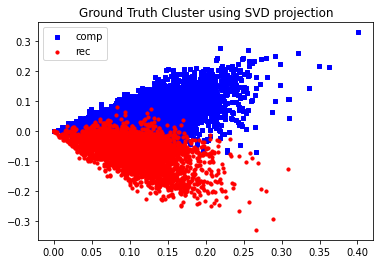

In [29]:
#Ground truth plotting
twoD_SVD = TruncatedSVD(n_components = 2, random_state = 0) # Projecting to 2D
data_svd_2d_ground_truth = twoD_SVD.fit_transform(tfidf_data)

comp_indices = np.where(true_labels == 0)
rec_indices = np.where(true_labels == 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data_svd_2d_ground_truth[comp_indices,0], data_svd_2d_ground_truth[comp_indices,1], s=10, c='b', marker="s", label='comp')
ax1.scatter(data_svd_2d_ground_truth[rec_indices,0], data_svd_2d_ground_truth[rec_indices,1], s=10, c='r', marker="o", label='rec')
plt.legend(loc='upper left')
plt.title("Ground Truth Cluster using SVD projection")
plt.show()

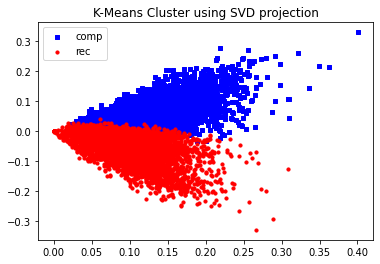

In [26]:
#Question 8
optimal_r_svd = 100

#Ground truth plotting
best_SVD = TruncatedSVD(n_components = optimal_r_svd, random_state = 0) # Projecting to 2D
data_svd = best_SVD.fit_transform(tfidf_data)

k_means_2 = KMeans(n_clusters = 2, random_state = 0, max_iter = 2000, n_init = 40)
k_means_2.fit(data_svd)
prediction = k_means_2.predict(data_svd)

twoD_SVD = TruncatedSVD(n_components = 2, random_state = 0) # Projecting to 2D
data_svd_2d_k_means = twoD_SVD.fit_transform(data_svd)

comp_indices = np.where(prediction == 0)
rec_indices = np.where(prediction == 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data_svd_2d_k_means[comp_indices,0], data_svd_2d_k_means[comp_indices,1], s=10, c='b', marker="s", label='comp')
ax1.scatter(data_svd_2d_k_means[rec_indices,0], data_svd_2d_k_means[rec_indices,1], s=10, c='r', marker="o", label='rec')
plt.legend(loc='upper left')
plt.title("K-Means Cluster using SVD projection")
plt.show()

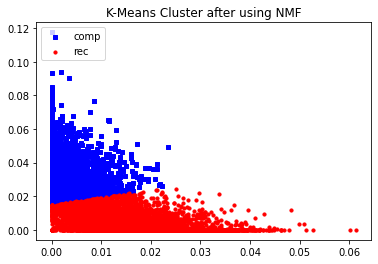

In [27]:
optimal_r_nmf = 2

#Ground truth plotting
nmf = NMF(n_components = optimal_r_nmf, init = 'random', random_state = 0,max_iter = 1000)
data_nmf = nmf.fit_transform(tfidf_data)

k_means_2 = KMeans(n_clusters = 2, random_state = 0, max_iter = 2000, n_init = 40)
k_means_2.fit(data_nmf)
prediction = k_means_2.predict(data_nmf)

#twoD_SVD = TruncatedSVD(n_components = 2, random_state = 0) # Projecting to 2D
#data_nmf_2d_k_means = twoD_SVD.fit_transform(data_nmf)

data_nmf_2d_k_means = data_nmf # since best r_nmf is 2 there is no need to project
comp_indices = np.where(prediction != 0)
rec_indices = np.where(prediction != 1) # clustering labels 0 as 1, 1 as 0

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data_nmf_2d_k_means[comp_indices,0], data_nmf_2d_k_means[comp_indices,1], s=10, c='b', marker="s", label='comp')
ax1.scatter(data_nmf_2d_k_means[rec_indices,0], data_nmf_2d_k_means[rec_indices,1], s=10, c='r', marker="o", label='rec')
plt.legend(loc='upper left')
plt.title("K-Means Cluster after using NMF")
plt.show()

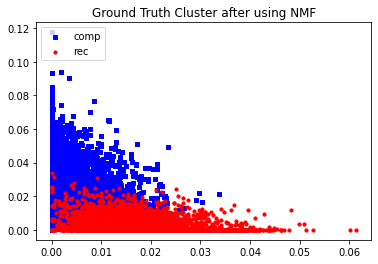

In [28]:
comp_indices = np.where(true_labels == 0)
rec_indices = np.where(true_labels == 1)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data_nmf_2d_k_means[comp_indices,0], data_nmf_2d_k_means[comp_indices,1], s=10, c='b', marker="s", label='comp')
ax1.scatter(data_nmf_2d_k_means[rec_indices,0], data_nmf_2d_k_means[rec_indices,1], s=10, c='r', marker="o", label='rec')
plt.legend(loc='upper left')
plt.title("Ground Truth Cluster after using NMF")
plt.show()